In [26]:
#Final version
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as op

In [27]:
#We calculated the values of the bethe-bloch equations for protons in a range of 10-250MeV
#define some constants to use with protons and water
k = 0.307075 # MeV g^-1 cm^2
z = 1 # proton charge in e
ZA = 0.55509 #Z/A ratio for material
c = 2.9979e8  #light speed
M =  939.595 # MeV is a charged proton mass
me = 0.511 # MeV is the electron mass
rho = 1 # g cm^-3 is water density
I = 7.5e-5 #MeV
e = 1 #electron charge in eV
E0 = 100
#define some functions
def Tmax(beta,gama):
    return (2*me*pow(beta*gama,2))*pow(10,6)/(1+2*gama*(me/M)+pow((me/M),2))
def beta2(E):
    return np.sqrt(pow(M,2)-pow(E,2))/np.sqrt(pow(M,2)+pow(E,2))
#Numerical integration of Bethe-Bloch while particle has energy>0
E0 = 0
Elost = 0
E=E0
dx = 0.01  #Step
x = 0.0    #initial value of x
m = 0    #counter
n = 2500
#xp = np.linspace(x,xn,n+1)     # x array for plot
#yp = np.empty(n+1,float)   # y array for plot
#yp[0] = E0
xx = np.zeros(n)
yy = np.zeros(n) 
print('Energy(MeV)\t\tSP')   #data table header
for E in np.arange(1,250,2):
    x+= dx  #update x-position
    beta = beta2(E)
    gama = 1/(1-pow(beta,2))
    tmax = Tmax(beta,gama)
  #solving Bethe-Bloch for current values of beta and gamma
    dEdx = k*pow(z,2)*ZA*rho*(1/pow(beta,2))*(0.5*np.log(2*0.511*pow(beta*gama,2)*tmax/(pow(I,2)))-pow(beta,2))
    Ei -= dEdx*dx
    Elost+=dEdx*dx
    #xp[m]=x
    #yp[m]=dEdx
    xx[m]=x
    yy[m]=dEdx
    m=m+1
    print('%f \t %f'% (E,dEdx))


Energy(MeV)		SP
1.000000 	 6.534374
3.000000 	 5.971288
5.000000 	 5.707534
7.000000 	 5.531817
9.000000 	 5.398686
11.000000 	 5.290674
13.000000 	 5.199257
15.000000 	 5.119666
17.000000 	 5.048976
19.000000 	 4.985269
21.000000 	 4.927220
23.000000 	 4.873873
25.000000 	 4.824514
27.000000 	 4.778591
29.000000 	 4.735670
31.000000 	 4.695399
33.000000 	 4.657489
35.000000 	 4.621699
37.000000 	 4.587826
39.000000 	 4.555694
41.000000 	 4.525155
43.000000 	 4.496077
45.000000 	 4.468346
47.000000 	 4.441860
49.000000 	 4.416530
51.000000 	 4.392276
53.000000 	 4.369027
55.000000 	 4.346718
57.000000 	 4.325292
59.000000 	 4.304696
61.000000 	 4.284882
63.000000 	 4.265806
65.000000 	 4.247430
67.000000 	 4.229717
69.000000 	 4.212633
71.000000 	 4.196148
73.000000 	 4.180232
75.000000 	 4.164861
77.000000 	 4.150010
79.000000 	 4.135656
81.000000 	 4.121778
83.000000 	 4.108357
85.000000 	 4.095375
87.000000 	 4.082814
89.000000 	 4.070659
91.000000 	 4.058896
93.000000 	 4.047509
95

In [132]:
#Load the data set from PSTAR-NIST
PSTAR = pd.read_csv('PSTAR.txt',sep='\s+',header=None)
PSTAR = pd.DataFrame(PSTAR)
a1 = PSTAR[0] #Energy T -> MeV
a2 = PSTAR[1]/1000.# Stopping Power Elec MeV/cm²g -> convert to mg
a3 = PSTAR[2]  # Nuclear sp
a4 = PSTAR[3]  # Total SP 
a5 = PSTAR[4]  #CSDA Range
a6 = PSTAR[5]  #Projected Range

#Load the data ser from SRIM
SRIM = pd.read_csv('SRIM.txt',sep='\s+',header=None)
SRIM = pd.DataFrame(SRIM)
x1 = SRIM[0] #Energy T -> MeV
x2 = SRIM[1] # de/dx Elec  MeV/cm²mg
x3 = SRIM[2]  # de/dx Nuc
x4 = SRIM[3]  # projected range
x4 = SRIM[4]  #longitudinal straggling
x5 = SRIM[5]  #Lateral Straggling

#Load the data from calculations
BB = pd.read_csv('bethe.txt',sep='\s+',header=None)
BB = pd.DataFrame(BB)
b1 = BB[0] #Energy E -> MeV
b2 = BB[1]# de/dx  MeV/cm²mg


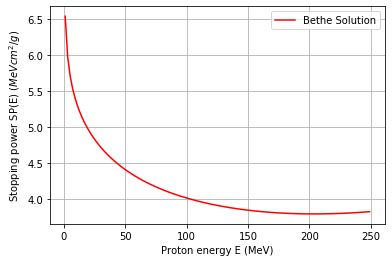

In [139]:
#Plot the Bethe formula
#plt.style.use('clasic')
plt.plot(b1,b2,'r-', label = 'Bethe Solution')
#plt.yscale('log')
plt.xlabel('Proton energy E (MeV)')
plt.ylabel('Stopping power SP(E)'' $(MeV cm^{2}/g)$')
#plt.xscale('log')
plt.grid()
plt.legend(loc='best')

plt.savefig('Bethe-1.png')
plt.show()

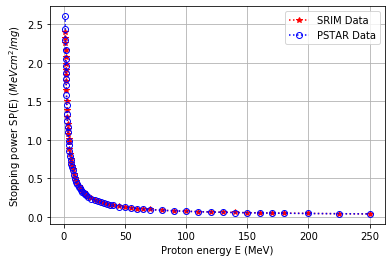

In [112]:
#Plot the data sets
#plt.style.use('seaborn-dark')
plt.plot(x1,x2,'r*:', label='SRIM Data')
plt.plot(a1,a2, 'bo:',fillstyle='none', label = 'PSTAR Data')
#plt.yscale('log')
plt.xlabel('Proton energy E (MeV)')
plt.ylabel('Stopping power SP(E)'' $(MeV cm^{2}/mg)$')
#plt.xscale('log')
#plt.ylim(0, 10)
plt.grid()
plt.legend(loc='best')
plt.savefig('dataset.png')
plt.show()


Estimated Parameters [1.75731339 0.46528011]
Mean R : 0.999686131115575
Std dev errors [0.00265174 0.00162823]


/home/kitzia/anaconda2/envs/my_py_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


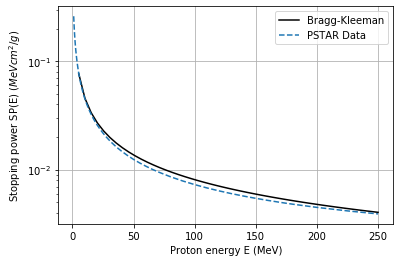

In [128]:
#Fit one of the data set to the empirical rule and find the parameter alpha and p
#Bragg-Klemann Rule
def BG(x, p, a):
    return (x**(1-p))/p*a
#Guessed parameters:
def get_rsq(f, y, popt):
    ss_res = np.dot((a2 - BG(a1, *popt)),(a2 - BG(a1, *popt)))
    ymean = np.mean(a2)
    ss_tot = np.dot((a2-ymean),(a2-ymean))
    return 1-ss_res/ss_tot
p0 = [1, 0.5]    
popt,pcov = op.curve_fit(BG, a1, a2, p0=p0)     
print("Estimated Parameters",popt)  
print("Mean R :",  get_rsq(BG, a2, popt))
#compute one standard deviation errors on the parameters use 
perr = np.sqrt(np.diag(pcov))
print("Std dev errors", perr)
x_BG = np.linspace(0,a1.max(),50)
a,p = popt
y_BG = BG(x_BG,a,p)
#Plot the results
#plt.plot(x_BG,y_BG,'ko:',fillstyle='none', label='Bragg-Kleeman')
plt.plot(x_BG,y_BG,'k-', label='Bragg-Kleeman')
plt.plot(a1,a2, '--', label = 'PSTAR Data')
plt.yscale('log')
plt.xlabel('Proton energy E (MeV)')
plt.ylabel('Stopping power SP(E)'' $(MeV cm^{2}/g)$')
#plt.xscale('log')
plt.grid()
plt.legend(loc='best')
#plt.savefig('braggkl.png')
plt.show()

Estimated Parameters [-7.50000009e-05]
Mean R : 0.9999999999996592
Std dev errors [1.10213819e-11]
Estimated Parameters [1.11019897 7.511319  ]
Mean R : 0.9841628092683132
Std dev errors [0.00113876 0.04534417]


/home/kitzia/anaconda2/envs/my_py_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/kitzia/anaconda2/envs/my_py_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/kitzia/anaconda2/envs/my_py_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


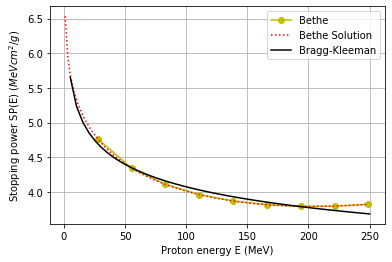

In [140]:
#Fit one of the data set to the empirical rule and find the parameter alpha and p
#Bethe-Bloch
def BB(E,I):   
    beta = beta2(E)
    gama = 1/(1-pow(beta,2))
    tmax = Tmax(beta,gama)
    return k*pow(z,2)*ZA*rho*(1/pow(beta,2))*(0.5*np.log(2*0.511*pow(beta*gama,2)*tmax/(pow(I,2)))-pow(beta,2))
#Guessed parameters:
def get_rsq(f, y, popt):
    ss_res = np.dot((b2 - BB(b1, *popt)),(b2 - BB(b1, *popt)))
    ymean = np.mean(b2)
    ss_tot = np.dot((b2-ymean),(b2-ymean))
    return 1-ss_res/ss_tot
p0 = [1]    
popt,pcov = op.curve_fit(BB, b1, b2, p0=p0)     
print("Estimated Parameters",popt)  
print("Mean R :",  get_rsq(BB, b2, popt))
perr = np.sqrt(np.diag(pcov))
print("Std dev errors", perr)
def get_rsq2(f, y, popt):
    ss_res = np.dot((b2 - BG(b1, *popt)),(b2 - BG(b1, *popt)))
    ymean = np.mean(b2)
    ss_tot = np.dot((b2-ymean),(b2-ymean))
    return 1-ss_res/ss_tot
p1 = [1, 0.5]    
popt2,pcov2 = op.curve_fit(BG, b1, b2, p1)     
print("Estimated Parameters",popt2)  
print("Mean R :",  get_rsq2(BG, b2, popt2))
perr2 = np.sqrt(np.diag(pcov2))
print("Std dev errors", perr2)
x_BG = np.linspace(0,a1.max(),50)
a,p = popt2
y_BG = BG(x_BG,a,p)
x_BB = np.linspace(0,b1.max(),10)
#x_BB = np.logspace(-3, 5, 300)
I = popt
y_BB = BB(x_BB,I)
#Plot the results
plt.plot(x_BB,y_BB,'yo-', label = 'Bethe') 
plt.plot(b1,b2,'r:', label = 'Bethe Solution')
plt.plot(x_BG,y_BG,'k-',fillstyle='none', label='Bragg-Kleeman')
#plt.yscale('log')
plt.xlabel('Proton energy E (MeV)')
plt.ylabel('Stopping power SP(E)'' $(MeV cm^{2}/g)$')
#plt.xscale('log')
plt.grid()
plt.legend(loc='best')
plt.savefig('bethe-fit2.png')
plt.show()